In [1]:
%matplotlib inline

import sys
import os
sys.path.append("../../..")
import inspect

import numpy as np
import scipy as sp
import re

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import exposure, img_as_float, morphology, color
from skimage.measure import label
from PIL import Image

from osgeo import gdal
import osr
import my_packages.My_Geoprocess as mgp
from sklearn.cluster import KMeans
from matplotlib import cm

from scipy import stats


# 

In [2]:
ImagesFolder = '../../../Poe/Images/Acolyte/S2A_MSIL1C_20180305T230901_N0206_R101_T58KEB_20180306T00234_bisAco/S2A_MSI_2018_03_05_23_09_01_T58KEB_L2R_tif/'
raster_wavelength = ['560']
raster_Name = ['rhos_' + f + '.tif' for f in raster_wavelength]
bands_data = []

for f in range(len(raster_Name)):
    raster_dataset = gdal.Open(ImagesFolder+raster_Name[f], gdal.GA_ReadOnly)
    band = raster_dataset.GetRasterBand(1)

geo_transform = raster_dataset.GetGeoTransform()
proj = raster_dataset.GetProjection()

rows, cols = (raster_dataset.RasterYSize, raster_dataset.RasterXSize)

# WorkingIndex = np.full((10980, 10980), False)
# WorkingIndex[5000:,0:8500] = True


In [3]:
npzfile = np.load('../../../Poe/CompressedData/XData.npz')
X = npzfile['VolumFreeR']
Blue, Green, Red = np.log(6000*X[:,:,1]), np.log(6000*X[:,:,2]), np.log(6000*X[:,:,3])
del X

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
r2, s, it = mgp.GetNeighboorRegress(Red, Green, (500,500), (5,5), verbose=True)

Block: 1, at location : [2:498] x [2:498]
Block: 2, at location : [2:498] x [498:994]
Block: 3, at location : [2:498] x [994:1490]
Block: 4, at location : [2:498] x [1490:1986]
Block: 5, at location : [2:498] x [1986:2482]
Block: 6, at location : [2:498] x [2482:2978]
Block: 7, at location : [2:498] x [2978:3474]
Block: 8, at location : [2:498] x [3474:3970]
Block: 9, at location : [2:498] x [3970:4466]
Block: 10, at location : [2:498] x [4466:4962]
Block: 11, at location : [2:498] x [4962:5458]
Block: 12, at location : [2:498] x [5458:5954]
Block: 13, at location : [2:498] x [5954:6450]
Block: 14, at location : [2:498] x [6450:6946]


../../..\my_packages\My_Geoprocess.py:853: RuntimeWarning: invalid value encountered in true_divide
  np.einsum('ijkl,ijkl->ij', x_norm, x_norm))


Block: 15, at location : [2:498] x [6946:7442]
Block: 16, at location : [2:498] x [7442:7938]
Block: 17, at location : [2:498] x [7938:8434]
Block: 18, at location : [2:498] x [8434:-2]
Block: 19, at location : [498:994] x [2:498]
Block: 20, at location : [498:994] x [498:994]
Block: 21, at location : [498:994] x [994:1490]
Block: 22, at location : [498:994] x [1490:1986]
Block: 23, at location : [498:994] x [1986:2482]
Block: 24, at location : [498:994] x [2482:2978]
Block: 25, at location : [498:994] x [2978:3474]
Block: 26, at location : [498:994] x [3474:3970]
Block: 27, at location : [498:994] x [3970:4466]
Block: 28, at location : [498:994] x [4466:4962]
Block: 29, at location : [498:994] x [4962:5458]
Block: 30, at location : [498:994] x [5458:5954]
Block: 31, at location : [498:994] x [5954:6450]
Block: 32, at location : [498:994] x [6450:6946]
Block: 33, at location : [498:994] x [6946:7442]
Block: 34, at location : [498:994] x [7442:7938]
Block: 35, at location : [498:994] x 

../../..\my_packages\My_Geoprocess.py:850: RuntimeWarning: invalid value encountered in subtract
  y_norm = y - y_mean


Block: 39, at location : [994:1490] x [994:1490]
Block: 40, at location : [994:1490] x [1490:1986]
Block: 41, at location : [994:1490] x [1986:2482]
Block: 42, at location : [994:1490] x [2482:2978]
Block: 43, at location : [994:1490] x [2978:3474]
Block: 44, at location : [994:1490] x [3474:3970]
Block: 45, at location : [994:1490] x [3970:4466]
Block: 46, at location : [994:1490] x [4466:4962]
Block: 47, at location : [994:1490] x [4962:5458]
Block: 48, at location : [994:1490] x [5458:5954]
Block: 49, at location : [994:1490] x [5954:6450]
Block: 50, at location : [994:1490] x [6450:6946]
Block: 51, at location : [994:1490] x [6946:7442]
Block: 52, at location : [994:1490] x [7442:7938]
Block: 53, at location : [994:1490] x [7938:8434]
Block: 54, at location : [994:1490] x [8434:-2]
Block: 55, at location : [1490:1986] x [2:498]
Block: 56, at location : [1490:1986] x [498:994]
Block: 57, at location : [1490:1986] x [994:1490]


../../..\my_packages\My_Geoprocess.py:848: RuntimeWarning: invalid value encountered in subtract
  x_norm = x - x_mean


Block: 58, at location : [1490:1986] x [1490:1986]
Block: 59, at location : [1490:1986] x [1986:2482]
Block: 60, at location : [1490:1986] x [2482:2978]
Block: 61, at location : [1490:1986] x [2978:3474]
Block: 62, at location : [1490:1986] x [3474:3970]
Block: 63, at location : [1490:1986] x [3970:4466]
Block: 64, at location : [1490:1986] x [4466:4962]
Block: 65, at location : [1490:1986] x [4962:5458]
Block: 66, at location : [1490:1986] x [5458:5954]
Block: 67, at location : [1490:1986] x [5954:6450]
Block: 68, at location : [1490:1986] x [6450:6946]
Block: 69, at location : [1490:1986] x [6946:7442]
Block: 70, at location : [1490:1986] x [7442:7938]
Block: 71, at location : [1490:1986] x [7938:8434]
Block: 72, at location : [1490:1986] x [8434:-2]
Block: 73, at location : [1986:2482] x [2:498]
Block: 74, at location : [1986:2482] x [498:994]
Block: 75, at location : [1986:2482] x [994:1490]
Block: 76, at location : [1986:2482] x [1490:1986]
Block: 77, at location : [1986:2482] x [

Block: 230, at location : [5954:-2] x [6450:6946]
Block: 231, at location : [5954:-2] x [6946:7442]
Block: 232, at location : [5954:-2] x [7442:7938]
Block: 233, at location : [5954:-2] x [7938:8434]
Block: 234, at location : [5954:-2] x [8434:-2]


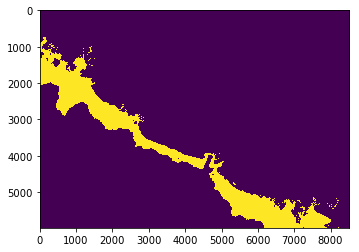

In [5]:
ShapeFolder = '../../Poe/Shapes/'
Lagoon = 'Mask/Lagoon.tif'

ClassifyIndex = gdal.Open(ImagesFolder + Lagoon, gdal.GA_ReadOnly)
ClassifyIndex = ClassifyIndex.GetRasterBand(1).ReadAsArray(xoff=0, yoff=5000, win_xsize=8500, win_ysize=5980).astype(bool)

plt.imshow(ClassifyIndex)

In [6]:
assert ClassifyIndex.shape==r2.shape
r2[~ClassifyIndex] = np.nan
s[~ClassifyIndex] = np.nan
it[~ClassifyIndex] = np.nan

In [31]:
visuelIt = np.full(it.shape, np.nan)
visuelIt[:,:] = it[:,:]
visuelIt[r2<0.9] = np.nan
visuelIt[s<0] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


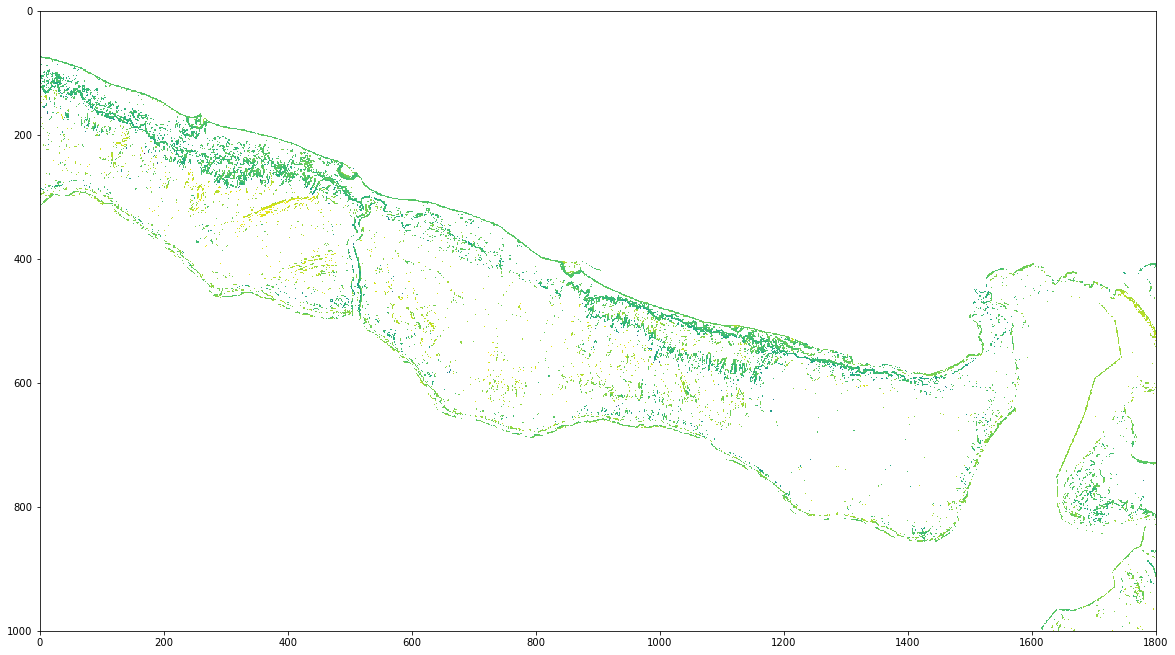

In [33]:
from matplotlib import colors
Meanit = np.nanmean(visuelIt[3500:4500,3000:4800])
Stdit = np.nanstd(visuelIt[3500:4500,3000:4800])

'''cmap = colors.ListedColormap(['blue', 'red'])
bounds=[0,0.96,3]
norm = colors.BoundaryNorm(bounds, cmap.N)'''
plt.figure(figsize=(20,20))
plt.imshow(visuelIt[3500:4500,3000:4800])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


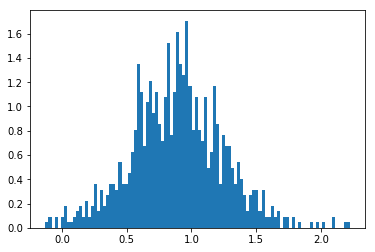

In [40]:
a,b,c = plt.hist(x=it[np.logical_and(np.logical_and(s>0.90,s<1 ),r2>0.99)],bins=100, normed=True)

In [ ]:
s.flatten()

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(s[3500:4500,3000:4500])

In [ ]:
np.nanmax(s)